# EAM Analysis

In [1]:
import mdapy as mp
from mdapy.potential_tool import get_eos
mp.__version__

'1.0.0a2'

### Generate an EAM alloy for CoNiFeAlCu

In [2]:
element_list = ['Co', 'Ni', 'Fe', 'Al', 'Cu']
element_ratio = [0.25, 0.25, 0.25, 0.075, 0.175]

In [3]:
mp.EAMGenerator(element_list);

In [4]:
eam = mp.EAM('CoNiFeAlCu.eam.alloy')

### Generate an average EAM

In [5]:
mp.EAMAverage('CoNiFeAlCu.eam.alloy', element_ratio);

In [6]:
eam_ave = mp.EAM('CoNiFeAlCu.average.eam.alloy')

### Check EAM data

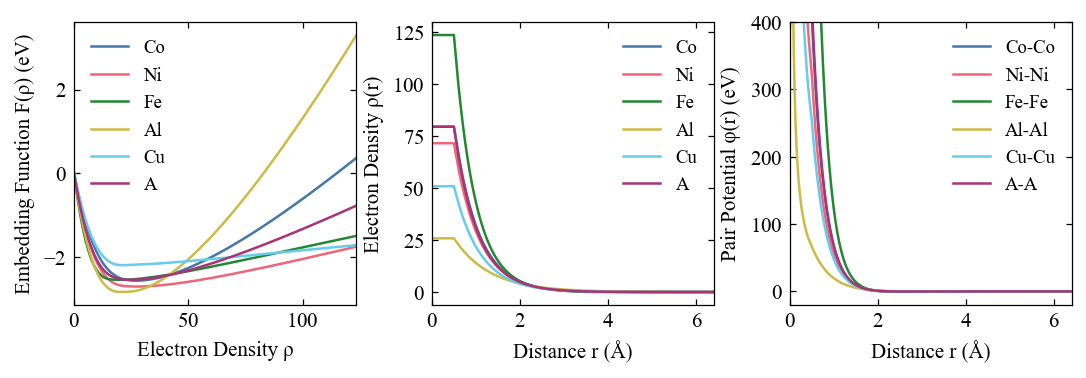

In [7]:
fig, ax = eam_ave.plot()
ax[2].set_ylim(-20, 400);

### Compare the mechanical properties predicted by EAM and average EAM

In [8]:
a_model = mp.build_crystal('A', 'fcc', 3.6, nx=3, ny=3, nz=3)
a_model.calc = eam_ave
a_eos = get_eos(a_model, 0.9, 1.1, 21)

In [9]:
model = mp.build_hea(element_list, element_ratio, 'fcc', 3.6, nx=3, ny=3, nz=3, random_seed=1)
model.calc = eam
eos = get_eos(model, 0.9, 1.1, 21)

### Compare with lammps

Make sure you have installed LAMMPS python package

In [10]:
from mdapy.lammps_potential import LammpsPotential

In [11]:
eam_lmp = LammpsPotential(
    pair_parameter="""
    pair_style eam/alloy
    pair_coeff * * CoNiFeAlCu.eam.alloy Co Ni Fe Al Cu
    """,
    element_list=element_list
)
model.calc = eam_lmp
eos_lmp = get_eos(model, 0.9, 1.1, 21)

In [12]:
eam_lmp_a = LammpsPotential(
    pair_parameter="""
    pair_style eam/alloy
    pair_coeff * * CoNiFeAlCu.average.eam.alloy A
    """,
    element_list=['A']
)
a_model.calc = eam_lmp_a
a_eos_lmp = get_eos(a_model, 0.9, 1.1, 21)

Text(0, 0.5, 'PE (eV/atom)')

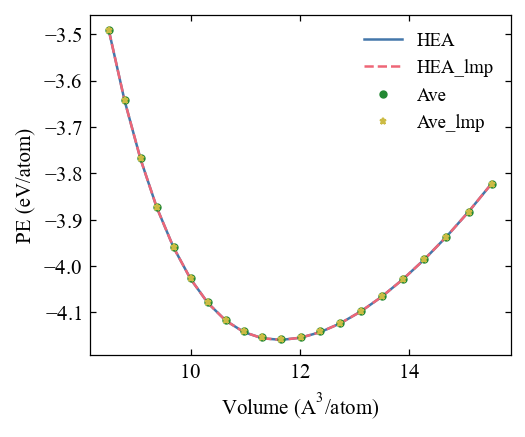

In [13]:
fig, ax = mp.set_figure()

ax.plot(eos[:, 0], eos[:, 1], label='HEA')
ax.plot(eos_lmp[:, 0], eos_lmp[:, 1], '--', label='HEA_lmp')
ax.plot(a_eos[:, 0], a_eos[:, 1], 'o', label='Ave')
ax.plot(a_eos_lmp[:, 0], a_eos_lmp[:, 1], '*', label='Ave_lmp')
ax.legend()

ax.set_xlabel(r'Volume ($\mathregular{A^3}$/atom)')
ax.set_ylabel('PE (eV/atom)')

In [14]:
import os

os.remove('CoNiFeAlCu.average.eam.alloy')
os.remove('CoNiFeAlCu.eam.alloy')